In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train_corr = train.corr()['target'].sort_values(ascending=False)
print(train_corr)

target    1.000000
V10       0.234229
V12       0.168100
V21       0.152429
V19       0.131519
V17       0.130899
V8        0.111304
V7        0.106893
V9        0.098017
V18       0.070206
male      0.055503
V11       0.051979
V15       0.044790
V1        0.037899
V20       0.013327
V16       0.005008
V3        0.002910
V4       -0.009451
V2       -0.028472
V5       -0.034242
V14      -0.066823
V6       -0.079594
V13      -0.079638
age      -0.083560
Name: target, dtype: float64


In [140]:
ms = []
for i in train.columns.drop("target"):
    ms.append(int(train[i].mean()+0.59))
print(ms)

[41, 1, 1041834, 611490, 1655138, 2629221, 2514074, 3118, 108, 6, 105, 4, 6, 1, 102, 83, 41033, 270685, 2, 4, 2, 54420, 8]


C:\Users\am429\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\am429\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\am429\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'var = V10')

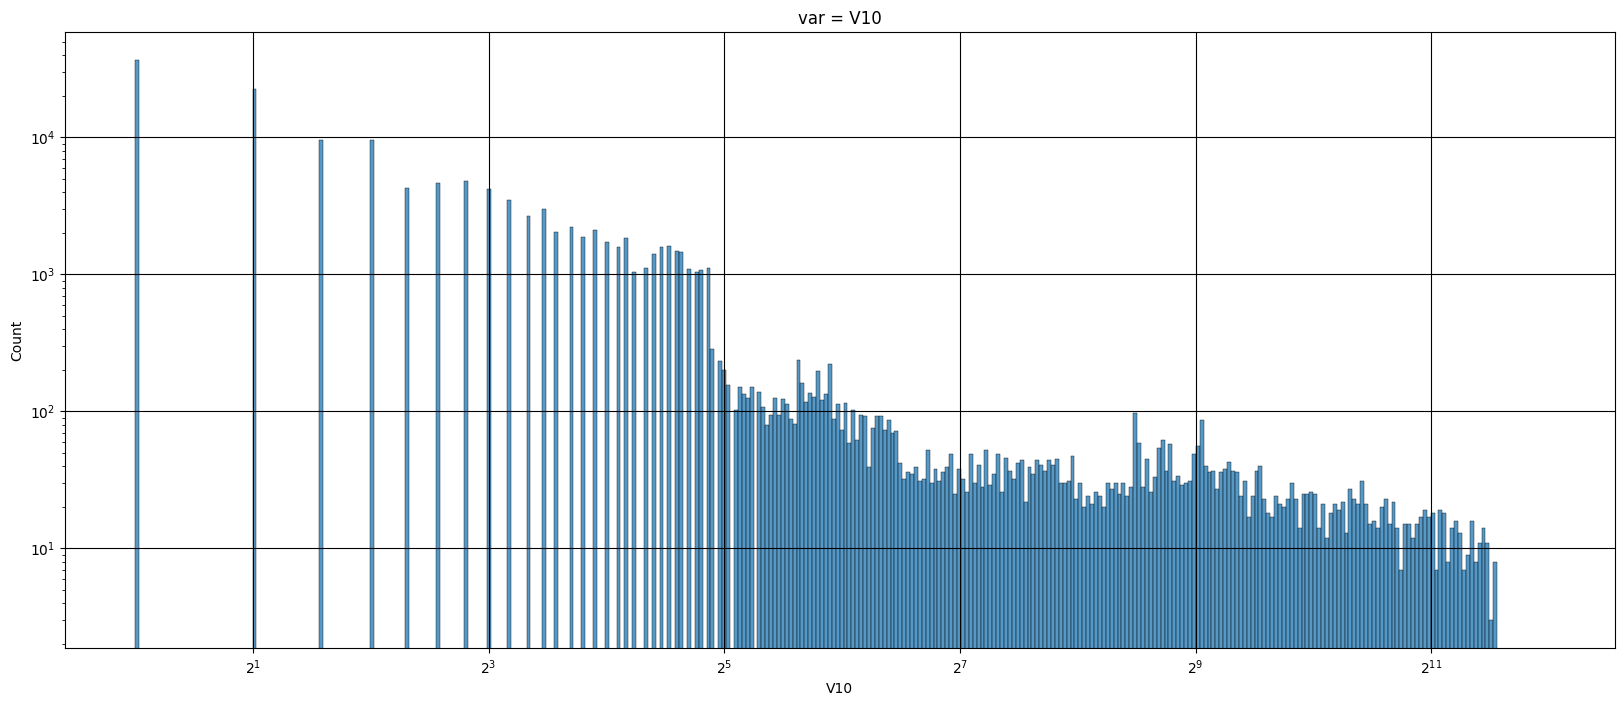

In [125]:
import matplotlib.pyplot as plt
import seaborn as sbn

# тут я убрал нолики, чтобы было легче смотреть

plt.figure(figsize= (20,8))
sbn.histplot(x=train["V10"], log_scale=(2, 10), binrange = (0, 3.6), binwidth=0.01)
plt.grid(color="black")
plt.title('var = {}'.format("V10"))

In [132]:
print(train["V10"].min())
print(train["V10"].max())
print(train["V10"].median())
print(train["V10"].mean())
num = []
for i in list(train["V10"]):
    if not i in num: num.append(i) 

num.sort()
print(num)

amo = [0]*len(num)
for i in list(train["V10"]):
    amo[num.index(i)]+=1 
print(amo)
data = pd.DataFrame(index=num, columns=["Количество"], data = amo)
print(data)

dec = [0]*300
for i in num:
    dec[int(i/10)] += amo[num.index(i)]
decn = []
for i in dec:
    if i != 0: decn.append(dec.index(i)+1) 

import xlsxwriter 
 
workbook = xlsxwriter.Workbook('sample.xlsx') 
worksheet = workbook.add_worksheet() 
 
# Writing to row and column respectively
worksheet.write(0,0, "Число")
worksheet.write(0,1, "Количество")
worksheet.write_column(1, 0, num)
worksheet.write_column(1, 1, amo)

worksheet.write_row(1,3, ["Минимум:", 0])
worksheet.write_row(2,3, ["Максимум:", 2992])
worksheet.write_row(3,3, ["Медиана:", 0])
worksheet.write_row(4,3, ["Среднее:", 3.771645])
worksheet.write_row(5,3, ["Variable name", "V10"])

worksheet.write_column(1, 6, decn)
worksheet.write_column(1, 7, dec)
 
workbook.close()

0
2992
0.0
3.771645
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,

Вероятность его дефолта: 0.06767467769661348


C:\Users\am429\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
